# Import

In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

#load MNIST dataset 
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

C:\Users\Ali\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Load image

In [28]:

index = 1029

img = mnist.train.images[index]

label = mnist.train.labels[index]

print('Label:', np.argmax(label))

Label: 6


# Plot with shape 28x28

Shape before: (784,)
Shape after: (28, 28)


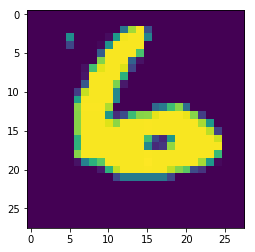

In [29]:

print('Shape before:', img.shape)
img = img.reshape( 28, 28)
#the image are stored as vector, need to convert in matrix in order to visualize it
print('Shape after:',img.shape)
plt.imshow(img)
plt.show()

# Max Pooling

New Shape: (14, 14)


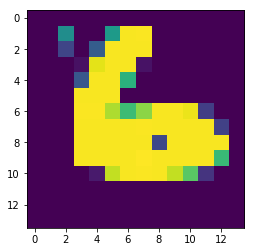

In [30]:
p_max = tf.nn.pool(input=img.reshape(1, 28,28,1), #reshape to fit the input of tf.nn.pool, (batch_size, img shape, img shape, channel)
    window_shape=[2, 2],
    pooling_type="MAX",
    padding="VALID",
    strides=[2,2])

#remove the first and last dimension added by the reshape
p_max = tf.squeeze(p_max, [0, 3])
print('New Shape:', p_max.shape)

#defines a session
sess = tf.Session()

# Use sess.run() to print the img from the tensor
plt.imshow(sess.run(p_max))

# Average Pooling

New Shape: (14, 14)


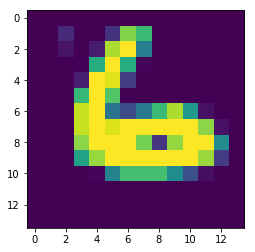

In [31]:
p_avg = tf.nn.pool(input=img.reshape(1,28,28,1), #reshape to fit the input of tf.nn.pool, (batch_size, img shape, img shape, channel)
    window_shape=[2, 2],
    pooling_type="AVG",
    padding="SAME", 
    strides=[2,2])

#remove the first and last dimension added by the reshape
p_avg = tf.squeeze(p_avg, [0, 3])
print('New Shape:', p_avg.shape)

#defines a session
sess = tf.Session()

# Use sess.run() to print the img from the tensor
plt.imshow(sess.run(p_avg))